In [156]:
#import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [157]:
## Read the dataset using pandas
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
## Devide the dataset into input and target, X contains input and Y contains target data
X = data.drop(['Outcome'],axis =1)
Y = data['Outcome']

In [159]:
## Input data scalling
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [173]:
## Dimensionality reduction to 2d using Principle component analysis 
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.26179749 0.21640127]
[40.10590727 36.4632608 ]


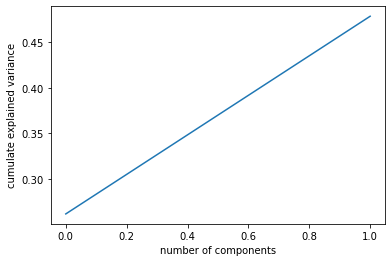

In [174]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulate explained variance')
plt.show()

Text(0, 0.5, 'Second Principal Component')

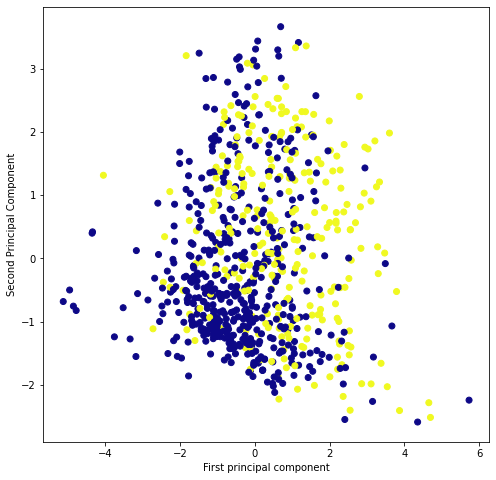

In [178]:
## Plotting the reduced dimensional data of the train split in a 2d plane
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [176]:
#print(X_pca.shape, X.shape)

In [177]:
## Train, test, and validation split with ratio 70:20:10
X_train, X_rem, y_train, y_rem = train_test_split(X_pca,Y,train_size = 0.70, random_state = 42)
# split the training data into test and validation set
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.33)

Text(0, 0.5, 'Second Principal Component')

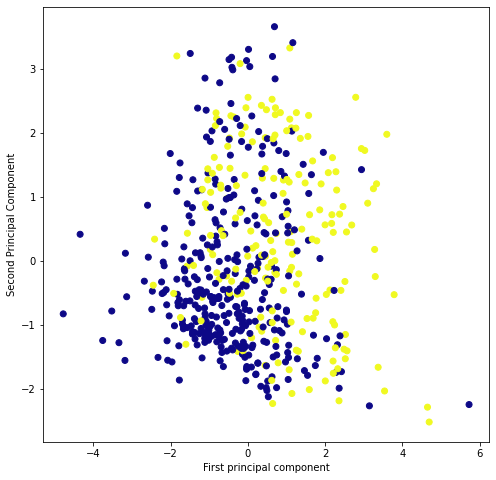

In [165]:
## Plotting the reduced dimensional training data of the train split in a 2d plane
plt.figure(figsize=(8,8))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [166]:
## Train the SVM classifier (sklearn.svm.SVC) on the reduced dimensional data generated after PCA
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred_v = model.predict(X_valid)
    print("Validation Accuracy with kernel", k)
    print(accuracy_score(y_valid, y_pred_v)) 
    y_pred = model.predict(X_test)
    print("Test Accuracy with kernel", k)
    print(accuracy_score(y_test, y_pred))  
    print("------------------------------")

Validation Accuracy with kernel linear
0.7142857142857143
Test Accuracy with kernel linear
0.8181818181818182
------------------------------
Validation Accuracy with kernel poly
0.7402597402597403
Test Accuracy with kernel poly
0.7792207792207793
------------------------------
Validation Accuracy with kernel rbf
0.7142857142857143
Test Accuracy with kernel rbf
0.8181818181818182
------------------------------
Validation Accuracy with kernel sigmoid
0.6688311688311688
Test Accuracy with kernel sigmoid
0.6883116883116883
------------------------------


In [179]:
## Reducing the feature dimension of the above data into a one dimensional feature space using Linear Discriminant Analysis (LDA)
lda = LDA(n_components=1)
lda.fit(X, Y)
X_lda = lda.transform(X)

In [180]:
X_lda.shape

(768, 1)

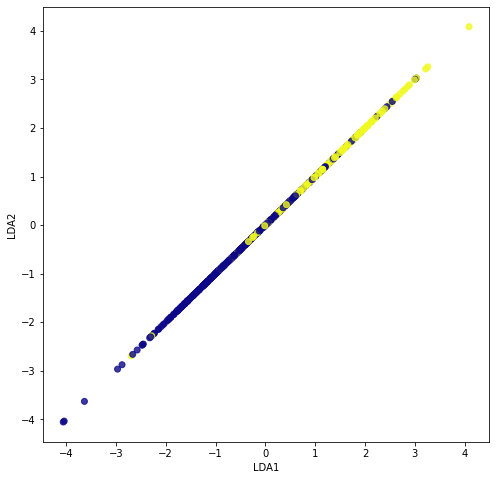

In [181]:
plt.figure(figsize=(8,8))
plt.scatter(X_lda[:,0],X_lda[:,-1],c=Y,cmap='plasma',alpha = 0.8)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.show()

In [182]:
X_train_lda, X_rem_lda, y_train_lda, y_rem_lda = train_test_split(X_lda, Y, train_size = 0.70, random_state = 42)
# split the training data into test and validation set
X_valid_lda, X_test_lda, y_valid_lda, y_test_lda = train_test_split(X_rem_lda, y_rem_lda, test_size=0.33)

In [183]:
# SVM Kernels( Accuracy on training dataset)
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train_lda, y_train_lda)
    y_pred_lda = model.predict(X_valid_lda)
    print(k," validation accuracy")
    print(accuracy_score(y_valid_lda, y_pred_lda))
    y_pred_test_lda = model.predict(X_test_lda)
    print(k, " Test Accuracy")
    print(accuracy_score(y_test_lda, y_pred_test_lda))
    print("------------------------------")

linear  validation accuracy
0.7922077922077922
linear  Test Accuracy
0.7662337662337663
------------------------------
poly  validation accuracy
0.7597402597402597
poly  Test Accuracy
0.7272727272727273
------------------------------
rbf  validation accuracy
0.7727272727272727
rbf  Test Accuracy
0.7402597402597403
------------------------------
sigmoid  validation accuracy
0.7922077922077922
sigmoid  Test Accuracy
0.7662337662337663
------------------------------
